# Проект "Авиарейсы без потерь"

На предыдущем этапе проекта был выполнен запрос SQL к базе данных об авиаперелетах в России. В результате запроса получен csv-файл, содержащий информацию об авиперелетах из Анапы в январе-феврале 2017 года. В дальнейшем предполагается работа над датасетом с целью выяснить рентабельность перелетов из Анапы в зимний период.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
awf = pd.read_csv('anapa_winter_flights.csv')

In [3]:
display(awf.head(10))
awf.info()

,flight_id,flight_no,actual_departure,actual_arrival,flight_in_hours,departure_city,arrival_city,aircraft_code,model,range,total_seats,total_fillment,business_class,business_fillment,economy_class,economy_fillment,businesst_amount,total_flight_amount,cost_of_flight
0,136546,PG0194,2017-01-03T06:13:00Z,2017-01-03T11:15:00Z,5.033333,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,500534.799999
1,136523,PG0194,2017-01-10T06:14:00Z,2017-01-10T11:26:00Z,5.200000,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,517108.800001
2,136540,PG0194,2017-01-17T06:14:00Z,2017-01-17T11:21:00Z,5.116667,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,508821.799997
3,136560,PG0194,2017-01-24T06:13:00Z,2017-01-24T11:18:00Z,5.083333,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,505506.999998
4,136544,PG0194,2017-01-31T06:10:00Z,2017-01-31T11:14:00Z,5.066667,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,503849.599998
5,136514,PG0194,2017-02-07T06:14:00Z,2017-02-07T11:13:00Z,4.983333,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,495562.600000
6,136567,PG0194,2017-02-14T06:12:00Z,2017-02-14T11:23:00Z,5.183333,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,515451.400002
7,136511,PG0194,2017-02-21T06:15:00Z,2017-02-21T11:25:00Z,5.166667,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,513794.000002
8,136513,PG0194,2017-02-28T06:13:00Z,2017-02-28T11:23:00Z,5.166667,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,513794.000002
9,136420,PG0252,2017-01-01T10:09:00Z,2017-01-01T11:47:00Z,1.633333,Anapa,Moscow,733,Boeing 737-300,4200,130,104,12,11,118,93,402600.0,1542000.0,162425.199997


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            127 non-null    int64  
 1   flight_no            127 non-null    object 
 2   actual_departure     127 non-null    object 
 3   actual_arrival       127 non-null    object 
 4   flight_in_hours      127 non-null    float64
 5   departure_city       127 non-null    object 
 6   arrival_city         127 non-null    object 
 7   aircraft_code        127 non-null    object 
 8   model                127 non-null    object 
 9   range                127 non-null    int64  
 10  total_seats          127 non-null    int64  
 11  total_fillment       127 non-null    int64  
 12  business_class       127 non-null    int64  
 13  business_fillment    127 non-null    int64  
 14  economy_class        127 non-null    int64  
 15  economy_fillment     127 non-null    int

Причешем немного наш датасет: сделаем более наглядными дату и время, добавим колонок не извлеченных запросом SQL, уберем те что не стоило запрашивать (по-хорошему надо бы пересобрать csv-шку на предмет не включения бесполезных столбцов, но с моим тяжеленным запросом страшно даже начинать),так же округлим некоторые значения. 

In [4]:
# Функция для перевода в формат datetime
def str_to_date (date_sql):
    real_date = datetime.strptime(date_sql, '%Y-%m-%dT%H:%M:%SZ')    
    return real_date

# Функция извлечения месяца из даты
def date_to_month (date):
    m_num = date.month
    return m_num

In [5]:
# Приводим в божеский вид время отлета, прилета и время в пути
awf['actual_departure'] = awf['actual_departure'].apply(str_to_date)
awf['actual_arrival'] = awf['actual_arrival'].apply(str_to_date)
awf['flight_in_hours'] = awf['actual_arrival'] - awf['actual_departure']
awf.head()

,flight_id,flight_no,actual_departure,actual_arrival,flight_in_hours,departure_city,arrival_city,aircraft_code,model,range,total_seats,total_fillment,business_class,business_fillment,economy_class,economy_fillment,businesst_amount,total_flight_amount,cost_of_flight
0,136546,PG0194,2017-01-03 06:13:00,2017-01-03 11:15:00,05:02:00,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,500534.799999
1,136523,PG0194,2017-01-10 06:14:00,2017-01-10 11:26:00,05:12:00,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,517108.800001
2,136540,PG0194,2017-01-17 06:14:00,2017-01-17 11:21:00,05:07:00,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,508821.799997
3,136560,PG0194,2017-01-24 06:13:00,2017-01-24 11:18:00,05:05:00,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,505506.999998
4,136544,PG0194,2017-01-31 06:10:00,2017-01-31 11:14:00,05:04:00,Anapa,Novokuznetsk,733,Boeing 737-300,4200,130,0,12,0,118,0,NaN,NaN,503849.599998


In [6]:
# Округлим значение себестоимости полета до целого числа
awf['cost_of_flight'] = round(awf['cost_of_flight'])

# Сборы с пассажиров эконом класса
awf['economy_amount'] = awf['total_flight_amount'] - awf['businesst_amount']

# Цены на билеты бизнесс и эконом классе
awf['price_business'] = round(awf['businesst_amount'] / awf['business_fillment'])
awf['price_economy'] = round(awf['economy_amount'] / awf['economy_fillment'])

# Номер месяца
awf['month_number'] = awf['actual_departure'].apply(date_to_month)

# Кое что удалим за ненадобностью
awf = awf.drop(['flight_id', 'aircraft_code', 'range'], axis=1)
awf.tail()

,flight_no,actual_departure,actual_arrival,flight_in_hours,departure_city,arrival_city,model,total_seats,total_fillment,business_class,business_fillment,economy_class,economy_fillment,businesst_amount,total_flight_amount,cost_of_flight,economy_amount,price_business,price_economy,month_number
122,PG0480,2017-02-24 09:30:00,2017-02-24 10:20:00,00:50:00,Anapa,Belgorod,Sukhoi Superjet-100,97,89,12,12,85,77,226800.0,714900.0,58700.0,488100.0,18900.0,6339.0,2
123,PG0480,2017-02-25 09:32:00,2017-02-25 10:22:00,00:50:00,Anapa,Belgorod,Sukhoi Superjet-100,97,94,12,12,85,82,226800.0,746400.0,58700.0,519600.0,18900.0,6337.0,2
124,PG0480,2017-02-26 09:32:00,2017-02-26 10:22:00,00:50:00,Anapa,Belgorod,Sukhoi Superjet-100,97,96,12,11,85,85,207900.0,746400.0,58700.0,538500.0,18900.0,6335.0,2
125,PG0480,2017-02-27 09:27:00,2017-02-27 10:17:00,00:50:00,Anapa,Belgorod,Sukhoi Superjet-100,97,97,12,12,85,85,226800.0,765300.0,58700.0,538500.0,18900.0,6335.0,2
126,PG0480,2017-02-28 09:26:00,2017-02-28 10:16:00,00:50:00,Anapa,Belgorod,Sukhoi Superjet-100,97,79,12,6,85,73,113400.0,575100.0,58700.0,461700.0,18900.0,6325.0,2


Выясним название и количество регулярных рейсов в нашей выборке

In [7]:
print(awf.flight_no.unique())
print('Количество регулярных рейсов -', awf.flight_no.nunique())

['PG0194' 'PG0252' 'PG0480']
Количество регулярных рейсов - 3


В нашей выборке всего три регулярных рейса, поэтому разделим наш датасет на три части в соответствии с рейсами, чтоб проанализировать каждый из них отдельно

In [8]:
ds_0194 = awf[awf.flight_no == 'PG0194']
ds_0252 = awf[awf.flight_no == 'PG0252']
ds_0480 = awf[awf.flight_no == 'PG0480']

display(ds_0194.head(2))
display(ds_0252.head(2))
display(ds_0480.head(2))

,flight_no,actual_departure,actual_arrival,flight_in_hours,departure_city,arrival_city,model,total_seats,total_fillment,business_class,business_fillment,economy_class,economy_fillment,businesst_amount,total_flight_amount,cost_of_flight,economy_amount,price_business,price_economy,month_number
0,PG0194,2017-01-03 06:13:00,2017-01-03 11:15:00,05:02:00,Anapa,Novokuznetsk,Boeing 737-300,130,0,12,0,118,0,NaN,NaN,500535.0,NaN,NaN,NaN,1
1,PG0194,2017-01-10 06:14:00,2017-01-10 11:26:00,05:12:00,Anapa,Novokuznetsk,Boeing 737-300,130,0,12,0,118,0,NaN,NaN,517109.0,NaN,NaN,NaN,1


,flight_no,actual_departure,actual_arrival,flight_in_hours,departure_city,arrival_city,model,total_seats,total_fillment,business_class,business_fillment,economy_class,economy_fillment,businesst_amount,total_flight_amount,cost_of_flight,economy_amount,price_business,price_economy,month_number
9,PG0252,2017-01-01 10:09:00,2017-01-01 11:47:00,01:38:00,Anapa,Moscow,Boeing 737-300,130,104,12,11,118,93,402600.0,1542000.0,162425.0,1139400.0,36600.0,12252.0,1
10,PG0252,2017-01-02 10:07:00,2017-01-02 11:46:00,01:39:00,Anapa,Moscow,Boeing 737-300,130,110,12,9,118,101,329400.0,1568800.0,164083.0,1239400.0,36600.0,12271.0,1


,flight_no,actual_departure,actual_arrival,flight_in_hours,departure_city,arrival_city,model,total_seats,total_fillment,business_class,business_fillment,economy_class,economy_fillment,businesst_amount,total_flight_amount,cost_of_flight,economy_amount,price_business,price_economy,month_number
68,PG0480,2017-01-01 09:27:00,2017-01-01 10:17:00,00:50:00,Anapa,Belgorod,Sukhoi Superjet-100,97,96,12,12,85,84,226800.0,759000.0,58700.0,532200.0,18900.0,6336.0,1
69,PG0480,2017-01-02 09:28:00,2017-01-02 10:18:00,00:50:00,Anapa,Belgorod,Sukhoi Superjet-100,97,82,12,9,85,73,170100.0,632400.0,58700.0,462300.0,18900.0,6333.0,1


## PG 0194 Анапа - Новокузнецк

Посмотрим на статистические показатели заполняемости рейса, цен на билеты и затрат на топливо

In [9]:
ds_0194.loc[: , ['total_fillment', 'business_fillment', 'economy_fillment',  'businesst_amount', 
                'economy_amount', 'price_business', 'price_economy', 'cost_of_flight']].describe()

,total_fillment,business_fillment,economy_fillment,businesst_amount,economy_amount,price_business,price_economy,cost_of_flight
count,9.0,9.0,9.0,0.0,0.0,0.0,0.0,9.000000
mean,0.0,0.0,0.0,NaN,NaN,NaN,NaN,508269.444444
std,0.0,0.0,0.0,NaN,NaN,NaN,NaN,7411.959746
min,0.0,0.0,0.0,NaN,NaN,NaN,NaN,495563.000000
25%,0.0,0.0,0.0,NaN,NaN,NaN,NaN,503850.000000
50%,0.0,0.0,0.0,NaN,NaN,NaN,NaN,508822.000000
75%,0.0,0.0,0.0,NaN,NaN,NaN,NaN,513794.000000
max,0.0,0.0,0.0,NaN,NaN,NaN,NaN,517109.000000


Очень странные дела. Из таблицы мы видим что было девять вылетов, но согласно данным пассажиров на них не было. Возможно самолеты летали порожняком, а из Новокузнецка в Анапу летели люди и приходилось лететь за ними без пассажиров (upd: вариант отпадает я сделал запросик по-быстрому, в обратную сторону тоже никого). Или же данные в базу не были внесены, тогда анализ не провести. Если же доверять этим данным, то рейс на зиму надо снимать.

## PG 0252 Анапа - Москва

Оценим статистические показатели

In [10]:
ds_0252.loc[: , ['total_fillment', 'business_fillment', 'economy_fillment',  'businesst_amount', 
                'economy_amount', 'price_business', 'price_economy', 'cost_of_flight']].describe()

,total_fillment,business_fillment,economy_fillment,businesst_amount,economy_amount,price_business,price_economy,cost_of_flight
count,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.0,59.000000,59.000000
mean,113.118644,10.508475,102.610169,384610.169492,1.257966e+06,36600.0,12259.694915,165459.135593
std,8.896115,1.394235,8.155846,51029.017083,1.000073e+05,0.0,10.767535,1632.869037
min,97.000000,6.000000,86.000000,219600.000000,1.052800e+06,36600.0,12226.000000,162425.000000
25%,107.000000,10.000000,98.000000,366000.000000,1.200400e+06,36600.0,12253.500000,164083.000000
50%,112.000000,11.000000,102.000000,402600.000000,1.249200e+06,36600.0,12260.000000,165740.000000
75%,120.000000,11.500000,108.000000,420900.000000,1.324200e+06,36600.0,12266.000000,165740.000000
max,130.000000,12.000000,118.000000,439200.000000,1.446800e+06,36600.0,12281.000000,170712.000000


Из таблицы видим что:
1. За два месяца было 59 вылетов
2. В среднем на рейсе было 113 человек из них 10 в бизнес и 103 в эконом-классе
3. Билет в бизнес-класс стоил 36000 рублей, билет в эконом-класс в среднем 12260 рублей
4. Затраты на топливо (в нашем случае считаем что себестоимость полета) в среднем составляли 165.5 тыс. рублей
5. Средний доход от продажи билетов на рейс составил: 384.6 тыс. руб (бизнес-класс), 1 млн. 258 тыс. руб (эконом-класс)

Посмотрим на распределение количества пассажиров за январь и февраль 2017 года

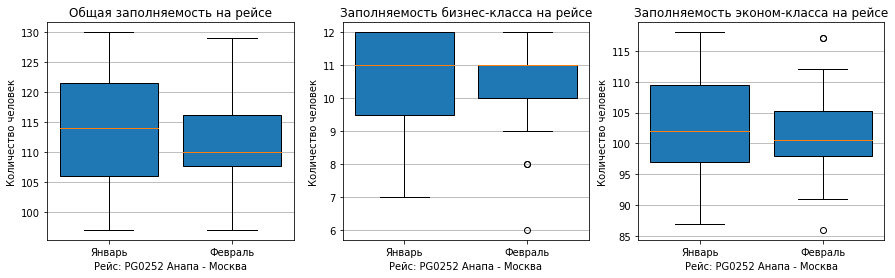

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

labels = ['Январь', 'Февраль']
mont_0252 = [ds_0252[ds_0252['month_number'] == 1].total_fillment, ds_0252[ds_0252['month_number'] == 2].total_fillment]

ax1.boxplot( mont_0252,  patch_artist=True, vert=True, widths = 0.8, labels = labels)
    
ax1.set_title('Общая заполняемость на рейсе')

monb_0252 = [ds_0252[ds_0252['month_number'] == 1].business_fillment, ds_0252[ds_0252['month_number'] == 2].business_fillment]

ax2.boxplot(monb_0252, vert=True, patch_artist=True, widths = 0.8, labels = labels)                       
ax2.set_title('Заполняемость бизнес-класса на рейсе')

mone_0252 = [ds_0252[ds_0252['month_number'] == 1].economy_fillment, ds_0252[ds_0252['month_number'] == 2].economy_fillment]

ax3.boxplot(mone_0252, vert=True, patch_artist=True, widths = 0.8, labels = labels)
                                    
ax3.set_title('Заполняемость эконом-класса на рейсе')
                
for ax in [ax1, ax2, ax3]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Рейс: PG0252 Анапа - Москва')
    ax.set_ylabel('Количество человек')


Видим что заполняемость рейсов по месяцам близка, однако в феврале ситуация немного стабильней. Вероятно из-за того что Январь праздничный месяц, сначала люди отсиживаются по домам, а потом всей толпой куда то летят.

Но не слишком ли большой самолет на рейсе? Посмотрим степень заполняемости самолета Боинг 737-300, на нем осуществляются перелеты.

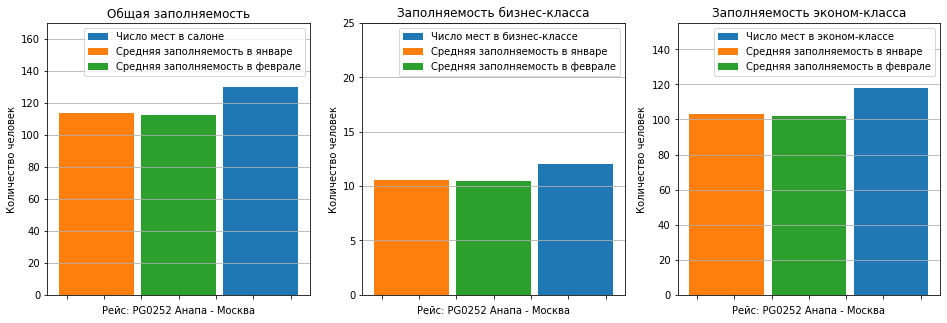

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

ax1.set_ylim(0, 170)
labels = ' '
width = 0.2
ax1.bar(x = width+0.22, height = ds_0252['total_seats'].mean(), 
                 align = 'center', width = width, label = 'Число мест в салоне')
ax1.bar(x = width-0.22, height = ds_0252[(ds_0252['month_number'] == 1)]['total_fillment'].mean(), 
                 align = 'center', width = width, label = 'Средняя заполняемость в январе')
ax1.bar(x = width, height = ds_0252[(ds_0252['month_number'] == 2)]['total_fillment'].mean(), 
                 align = 'center', width = width, label = 'Средняя заполняемость в феврале')
ax1.legend(loc = 1)
ax1.set_title('Общая заполняемость')
ax1.set_xticklabels(labels)

ax2.set_ylim(0, 25)

ax2.bar(x = width+0.22, height = ds_0252['business_class'].mean(),                 
                align = 'center', width = width, label = 'Число мест в бизнес-классе')
ax2.bar(x = width-0.22, height = ds_0252[(ds_0252['month_number'] == 1)]['business_fillment'].mean(), 
                align = 'center', width = width, label = 'Средняя заполняемость в январе')
ax2.bar(x = width, height = ds_0252[(ds_0252['month_number'] == 2)]['business_fillment'].mean(), 
                align = 'center', width = width, label = 'Средняя заполняемость в феврале')
ax2.legend(loc = 1)
ax2.set_title('Заполняемость бизнес-класса')


ax3.set_ylim(0, 155)
ax3.bar(x = width+0.22, height = ds_0252['economy_class'].mean(), 
                align = 'center', width = width, label = 'Число мест в эконом-классе')
ax3.bar(x = width-0.22, height = ds_0252[(ds_0252['month_number'] == 1)]['economy_fillment'].mean(), 
                align = 'center', width = width, label = 'Средняя заполняемость в январе')
ax3.bar(x = width, height = ds_0252[(ds_0252['month_number'] == 2)]['economy_fillment'].mean(), 
                align = 'center', width = width, label = 'Средняя заполняемость в феврале')
ax3.legend(loc = 1)
ax3.set_title('Заполняемость эконом-класса')


for ax in [ax1, ax2, ax3]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Рейс: PG0252 Анапа - Москва')
    ax.set_ylabel('Количество человек')
    ax.set_xticklabels(labels)
    

Как видим заполняемость очень хорошая и в бизнес и в эконом-классе. Все выглядит почти идеально.

Из уже полученных ранее данных было понятно что рейсы окупаются с лихвой. Оценим масштаб окупаемости.

Text(0, 0.5, 'тыс.руб')

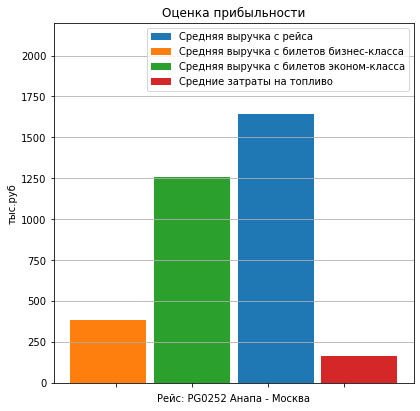

In [13]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.set_ylim(0, 2200)
labels = ' '
width = 0.2
ax1.bar(x = width+0.22, height = ds_0252['total_flight_amount'].mean()/1000, 
                 align = 'center', width = width, label = 'Средняя выручка с рейса')
ax1.bar(x = width-0.22, height = ds_0252['businesst_amount'].mean()/1000, 
                 align = 'center', width = width, label = 'Средняя выручка с билетов бизнес-класса')
ax1.bar(x = width, height = ds_0252['economy_amount'].mean()/1000, 
                 align = 'center', width = width, label = 'Средняя выручка с билетов эконом-класса')
ax1.bar(x = width+0.44, height = ds_0252['cost_of_flight'].mean()/1000, 
                 align = 'center', width = width, label = 'Средние затраты на топливо')

ax1.legend(loc = 1)
ax1.set_title('Оценка прибыльности')
ax1.set_xticklabels(labels)

ax1.yaxis.grid(True)
ax1.set_xlabel('Рейс: PG0252 Анапа - Москва')
ax1.set_ylabel('тыс.руб')   


    

Матерь божья, вот они сверхдоходы: достаточно половины от имеющегося дохода с продажи билетов в бизнес-класс чтобы окупить рейс! Ну-да ну-да я не учел налоги, страховки, плату за стоянку в аэропорту, тот факт что надо отбить стоимость самолета и наверное много чего еще, но в рамках наших допущений размах впечатляет.

## PG 0480 Анапа - Белгород

Оценим статистические показатели

In [14]:
ds_0480.loc[: , ['total_fillment', 'business_fillment', 'economy_fillment',  'businesst_amount', 
                'economy_amount', 'price_business', 'price_economy', 'cost_of_flight']].describe()

,total_fillment,business_fillment,economy_fillment,businesst_amount,economy_amount,price_business,price_economy,cost_of_flight
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.0,59.000000,59.000000
mean,90.186441,11.067797,79.118644,209181.355932,501254.237288,18900.0,6335.406780,58799.491525
std,8.101670,1.350152,7.054186,25517.873888,44699.368668,0.0,4.136126,764.208907
min,64.000000,6.000000,54.000000,113400.000000,342000.000000,18900.0,6317.000000,57526.000000
25%,86.500000,10.000000,75.500000,189000.000000,478350.000000,18900.0,6335.000000,58700.000000
50%,95.000000,12.000000,83.000000,226800.000000,525900.000000,18900.0,6335.000000,58700.000000
75%,97.000000,12.000000,85.000000,226800.000000,538500.000000,18900.0,6336.500000,59287.000000
max,97.000000,12.000000,85.000000,226800.000000,538500.000000,18900.0,6345.000000,59874.000000


Из таблицы видим что:
1. За два месяца было 59 вылетов
2. В среднем на рейсе было 90 человек из них 11 в бизнес и 79 в эконом-классе
3. Билет в бизнес-класс стоил 18900 рублей, билет в эконом-класс в среднем 6335 рублей
4. Затраты на топливо (в нашем случае считаем что себестоимость полета) в среднем составляли 58.8 тыс. рублей
5. Средний доход от продажи билетов на рейс составил: 209.1 тыс. руб (бизнес-класс), 501 тыс. руб (эконом-класс)

Посмотрим на распределение количества пассажиров за январь и февраль 2017 года

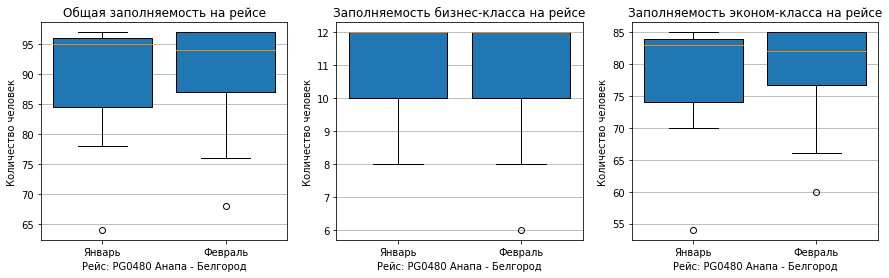

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

labels = ['Январь', 'Февраль']
mont_0480 = [ds_0480[ds_0480['month_number'] == 1].total_fillment, ds_0480[ds_0480['month_number'] == 2].total_fillment]

ax1.boxplot( mont_0480,  patch_artist=True, vert=True, widths = 0.8, labels = labels)
    
ax1.set_title('Общая заполняемость на рейсе')

monb_0480 = [ds_0480[ds_0480['month_number'] == 1].business_fillment, ds_0480[ds_0480['month_number'] == 2].business_fillment]

ax2.boxplot(monb_0480, vert=True, patch_artist=True, widths = 0.8, labels = labels)                       
ax2.set_title('Заполняемость бизнес-класса на рейсе')

mone_0480 = [ds_0480[ds_0480['month_number'] == 1].economy_fillment, ds_0480[ds_0480['month_number'] == 2].economy_fillment]

ax3.boxplot(mone_0480, vert=True, patch_artist=True, widths = 0.8, labels = labels)
                                    
ax3.set_title('Заполняемость эконом-класса на рейсе')
                
for ax in [ax1, ax2, ax3]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Рейс: PG0480 Анапа - Белгород')
    ax.set_ylabel('Количество человек')

Бизнес-класс как метроном: в 75% случаев 10-12 человек, причем 12 это еще и медиана, т.е как минимум в половине случаев летит 12 человек, в 25% случаев заполняемость 8-9 человек и один раз в феврале 6 человек. В феврале в эконом-классе заполнямость чуть выше чем в январе. А еще в обоих месяцах были случаи довольно низкой заполняемости в рамках данной выборки: 54 и 60 человек против медианных 83.

Посмотрим степень заполняемости модели этого рейса: SSJ-100.

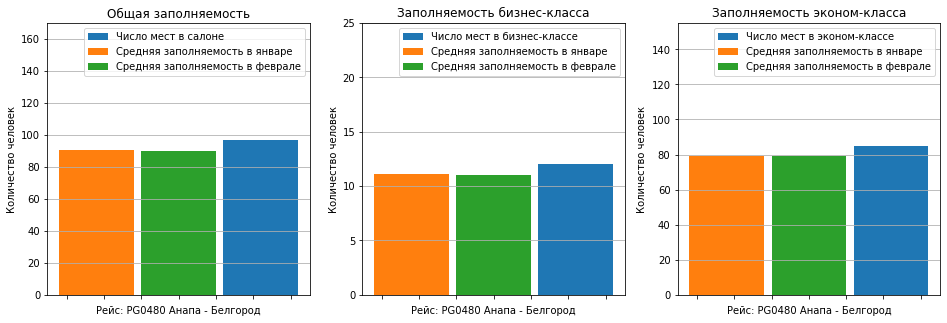

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

ax1.set_ylim(0, 170)
labels = ' '
width = 0.2
ax1.bar(x = width+0.22, height = ds_0480['total_seats'].mean(), 
                 align = 'center', width = width, label = 'Число мест в салоне')
ax1.bar(x = width-0.22, height = ds_0480[(ds_0480['month_number'] == 1)]['total_fillment'].mean(), 
                 align = 'center', width = width, label = 'Средняя заполняемость в январе')
ax1.bar(x = width, height = ds_0480[(ds_0480['month_number'] == 2)]['total_fillment'].mean(), 
                 align = 'center', width = width, label = 'Средняя заполняемость в феврале')
ax1.legend(loc = 1)
ax1.set_title('Общая заполняемость')
ax1.set_xticklabels(labels)

ax2.set_ylim(0, 25)

ax2.bar(x = width+0.22, height = ds_0480['business_class'].mean(),                 
                align = 'center', width = width, label = 'Число мест в бизнес-классе')
ax2.bar(x = width-0.22, height = ds_0480[(ds_0480['month_number'] == 1)]['business_fillment'].mean(), 
                align = 'center', width = width, label = 'Средняя заполняемость в январе')
ax2.bar(x = width, height = ds_0480[(ds_0480['month_number'] == 2)]['business_fillment'].mean(), 
                align = 'center', width = width, label = 'Средняя заполняемость в феврале')
ax2.legend(loc = 1)
ax2.set_title('Заполняемость бизнес-класса')


ax3.set_ylim(0, 155)
ax3.bar(x = width+0.22, height = ds_0480['economy_class'].mean(), 
                align = 'center', width = width, label = 'Число мест в эконом-классе')
ax3.bar(x = width-0.22, height = ds_0480[(ds_0480['month_number'] == 1)]['economy_fillment'].mean(), 
                align = 'center', width = width, label = 'Средняя заполняемость в январе')
ax3.bar(x = width, height = ds_0480[(ds_0480['month_number'] == 2)]['economy_fillment'].mean(), 
                align = 'center', width = width, label = 'Средняя заполняемость в феврале')
ax3.legend(loc = 1)
ax3.set_title('Заполняемость эконом-класса')


for ax in [ax1, ax2, ax3]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Рейс: PG0480 Анапа - Белгород')
    ax.set_ylabel('Количество человек')
    ax.set_xticklabels(labels)

Как и в предыдущем случае все очень и очень неплохо.

Оценим масштаб окупаемости.

Text(0, 0.5, 'тыс.руб')

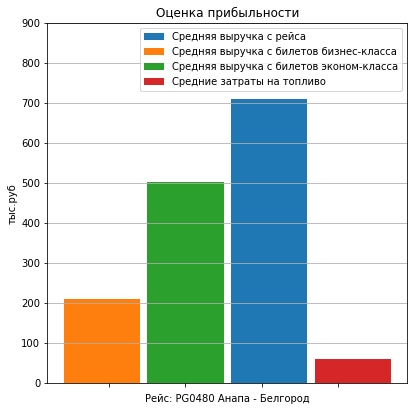

In [17]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.set_ylim(0, 900)
labels = ' '
width = 0.2
ax1.bar(x = width+0.22, height = ds_0480['total_flight_amount'].mean()/1000, 
                 align = 'center', width = width, label = 'Средняя выручка с рейса')
ax1.bar(x = width-0.22, height = ds_0480['businesst_amount'].mean()/1000, 
                 align = 'center', width = width, label = 'Средняя выручка с билетов бизнес-класса')
ax1.bar(x = width, height = ds_0480['economy_amount'].mean()/1000, 
                 align = 'center', width = width, label = 'Средняя выручка с билетов эконом-класса')
ax1.bar(x = width+0.44, height = ds_0480['cost_of_flight'].mean()/1000, 
                 align = 'center', width = width, label = 'Средние затраты на топливо')

ax1.legend(loc = 1)
ax1.set_title('Оценка прибыльности')
ax1.set_xticklabels(labels)

ax1.yaxis.grid(True)
ax1.set_xlabel('Рейс: PG0480 Анапа - Белгород')
ax1.set_ylabel('тыс.руб')   


Четырех пассажиров бизнес-класса или десяти эконом-класса хватит чтобы окупить рейс. Нехай летаютъ!

## Выводы и рекомендации

Рейс 0194 Анапа - Новокузнецк: авиакомпания теряет 165 тыс. рублей с каждого полета.
Рекомендация: если данные о количестве пассажиров точны, а необходимость держать рейс в строю присутствует, то возможно поставить на рейс борт с меньшим расходом топлива и приемлемой дальностью полета.


Рейс 0252 Анапа - Москва: авикомпания зарабатывает 1 млн. 477 тыс. руб с каждого рейса. Заполняемость рейсов близка к 100%-ной. 
Рекомендация: оставить все как есть.


Рейс 0480 Анапа - Белгород: авикомпания зарабатывает  652 тыс. руб с каждого рейса. Заполняемость рейсов близка к 100%-ной. Заполняемость бизнес-класса в более чем половине случаев 100%.
Рекомендация: Немного увеличить цену билетов в бизнес-класс с оглядкой на конкурентов если они есть.